<a href="https://colab.research.google.com/github/noelivander/AVD/blob/main/Pengaruh_Ville_ke_Emisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan

Import Library

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#MENGIMPORT PACKAGE2 YANG DIBUTUHKAN

Import data dalam format CSV

In [3]:
# Membaca data CSV
data = pd.read_csv('emisi.csv')
# Melihat 5 data pertama
print(data.head())

#MERUJUK DAN MENAMPILKAN FILE CSV YANG AKAN ANALISA
#HASIL OUTPUTNYA MENUNJUKKAN ADA 4 VARIABLE UTAMA DALAM DATA YANG DIGUNAKAN

   Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  Emisi CO2 (g/km)
0               8.1               6.5                   7.4               172
1               8.9               6.5                   7.8               181
2              11.1               8.3                   9.9               230
3              12.6               9.4                  11.2               263
4              13.8              11.2                  12.4               291


In [4]:
data.rename(columns={'Ville (L/100 km)': 'X', 'Emisi CO2 (g/km)': 'Y', 'Route (L/100 km)': 'A', 'kombinasi (L/100 km)': 'B'}, inplace=True)
print(data)

#PROSES UNTUK MENGUBAH NAMA TIAP VARIABEL MENJADI LEBIH SINGKAT
#TUJUANNYA UNTUK MEMPERMUDAH

        X     A     B    Y
0     8.1   6.5   7.4  172
1     8.9   6.5   7.8  181
2    11.1   8.3   9.9  230
3    12.6   9.4  11.2  263
4    13.8  11.2  12.4  291
..    ...   ...   ...  ...
637   9.7   7.5   8.7  205
638  10.7   8.1   9.5  223
639  10.1   7.8   9.1  213
640  10.0   7.8   9.0  212
641  11.5   9.0  10.4  244

[642 rows x 4 columns]


# Analisis

Menghitung matriks korelasi

In [5]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
print(correlation_matrix)

#OUTPUT MENUNJUKKAN KORELASI YANG KUAT ANTARA X (VILLE) DAN Y (EMISI C02)
#KORELASI ANTARA X DAN Y ADALAH 0,975617

          X         A         B         Y
X  1.000000  0.909671  0.986990  0.975617
A  0.909671  1.000000  0.961539  0.951061
B  0.986990  0.961539  1.000000  0.988786
Y  0.975617  0.951061  0.988786  1.000000


Membuat matriks korelasi

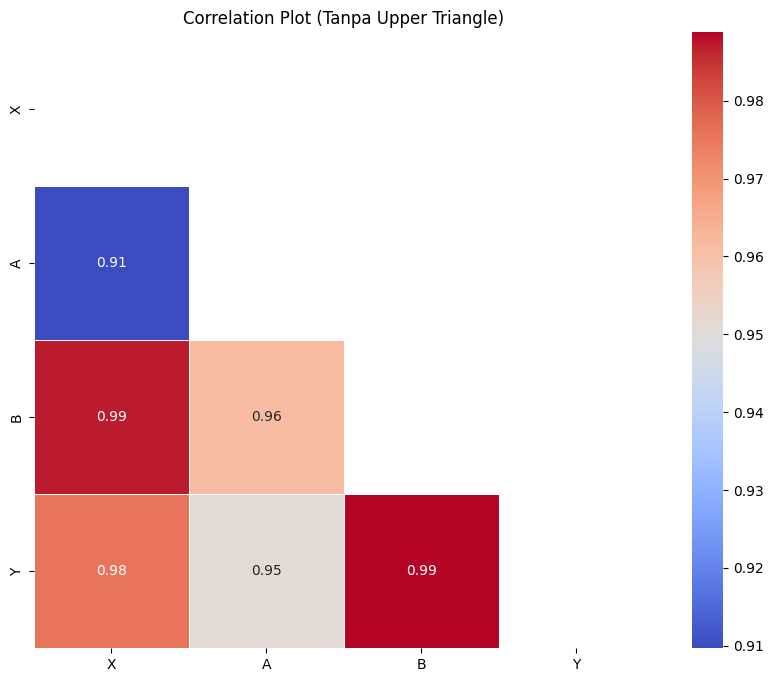

In [6]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

#WARNA MERAH MENUNJUKKAN KORELASI POSITIF TINGGI SEDANGKAN BIRU KEBALIKANNYA
#OUTPUT MENUNJUKKAN SEMUA VARIABEL MEMPUNYAI KORELASI POSITIF YANG KUAT TERMASUK X DAN Y (0.98)

Membuat model regresi sederhana

<Axes: xlabel='X', ylabel='Y'>

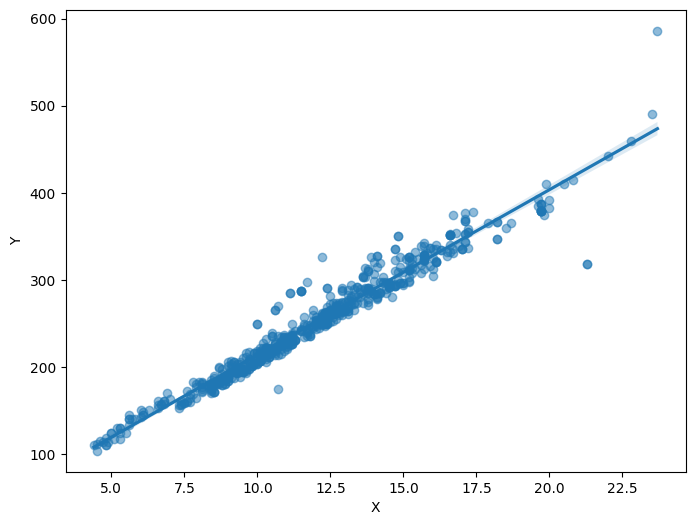

In [7]:
# Plot scatterplot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="X", y="Y", data=data, scatter_kws={"alpha": 0.5})

#TERDAPAT BEBERAPA TITIK YANG CUKUP JAUH DARI GARIS LINIER
#TETAPI SEBAGIAN BESAR TITIK MENGIKUTI GARIS LINIER YANG BERARTI HUBUNGAN LINIER CUKUP KUAT

Membuat Model Regresi Sederhana

In [8]:
from sklearn.linear_model import LinearRegression

#MENGIMPORT PAKET LINEARREGRESSION

In [9]:
# Pisahkan variabel independen (X) dan dependen (Y)
X = data[["X"]]  # Perlu diubah ke bentuk 2D
Y = data[["Y"]]

# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

#OUTPUT MENUNJUKKAN DUA KOLOM YAITU KOLOM NILAI X
#DAN KOLOM CONST DENGAN NILAI 1.0 YANG DIGUNAKAN AGAR MODEL REGRESI DAPAT MENGHITUNG INTERCEPT (TITIK POTONG DENGAN SUMBU Y)

In [10]:
X

,const,X
0,1.0,8.1
1,1.0,8.9
2,1.0,11.1
3,1.0,12.6
4,1.0,13.8
...,...,...
637,1.0,9.7
638,1.0,10.7
639,1.0,10.1
640,1.0,10.0


In [11]:
# Membuat model regresi linear
model = sm.OLS(Y, X).fit()

# Melihat ringkasan model
model.summary()

#OUTPUT MENUNJUKKAN BAHWA TIAP 1 L/100KM DALAM KONSUMSI BAHAN BAKAR MENINGKATKAN EMISI CO2 SEKITAR 18.94 G/KM
#NILAI INTERCEPT 24.77 MENUNJUKKAN BAHWA MESKIPUN KONSUMSI BAHAN BAKAR MENDEKATI 0, MASIH ADA EMISI DASAR SEBESAR 24.77 G/KM
#R2 95,2% MENUNJUKKAN MODEL YANG SANGAT BAIK

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:09:40   Log-Likelihood:                -2618.3
No. Observations:                 642   AIC:                             5241.
Df Residuals:                     640   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7691      2.096     11.815      0.000      20.652      28.886
X             18.9382      0.168    112.454      0.000      18.608      19.269
==============================================================================
Omnibus:                      176.815   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8794.363
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                      21.121   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(model)

#HASIL REGRESI DISIMPAN DALAM SEBUAH OBJEK PYTHON DARI STATSMODELS YANG BERISI BERBAGAI INFO DAN METODE TERKAIT MODEL REGRESI YANG TELAH DIBUAT

In [14]:
prediksi = model.predict(X)
prediksi

#OUTPUT INI MENUNJUKKAN HASIL PREDIKSI MODEL REGRESI UNTUK VARIABEL Y (EMISI CO2) BERDASARKAN NILAI X (KONSUMSI BAHAN BAKAR DALAM L/100 KM)
#MEREPRESENTASIKAN ESTIMASI EMISI CO2 YANG DIHITUNG MENGGUNAKAN PERSAMAAN REGRESI YANG TELAH DIBUAT

,0
0,178.168794
1,193.319386
2,234.983513
3,263.390873
4,286.116761
...,...
637,208.469978
638,227.408218
639,216.045274
640,214.151450


Visualisasi hasil prediksi

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

#OUTPUT MENUNJUKKAN BAHWA MODEL LinearRegression() TELAH BERHASIL DIBUAT DAN DI-FIT DENGAN DATA X DAN Y

LinearRegression()

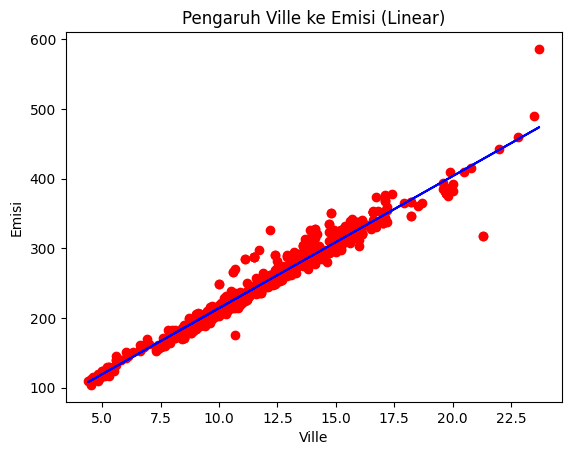

In [18]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg.predict(X), color = 'blue')
plt.title('Pengaruh Ville ke Emisi (Linear)')
plt.xlabel('Ville')
plt.ylabel('Emisi')
plt.show()

#TERDAPAT BEBERAPA TITIK YANG CUKUP JAUH DARI GARIS LINIER
#TETAPI SEBAGIAN BESAR TITIK MENGIKUTI GARIS LINIER YANG BERARTI HUBUNGAN LINIER CUKUP KUAT

# Evaluasi

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#KEMBALI MENGIMPOR BEBERAPA PACKAGE

In [22]:
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

#OUTPUT MSE DAN MAE MENUNJUKKAN SEBERAPA BESAR KESALAHAN MODEL DALAM MEMPREDIKSI DATA, DENGAN MAE MENUNJUKKAN RATA-RATA SELISIH ABSOLUT ANTARA PREDIKSI DAN NILAI SEBENARNYA
#NILAI R2 = 0.9518 MENUNJUKKAN BAHWA MODEL MENJELASKAN SEKITAR 95.18% VARIASI DATA, MENANDAKAN HUBUNGAN KUAT ANTARA VARIABEL X DAN Y

Mean Squared Error (MSE): 204.1479
Mean Absolute Error (MAE): 9.0293
R-squared (R²): 0.9518


# Membuat Model Model Regresi Polynomial

In [23]:
from sklearn.preprocessing import PolynomialFeatures

#KEMBALI MENGIMPOR BEBERAPA PACKAGE

In [25]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

#OUTPUT MENUNJUKKAN BAHWA MODEL LinearRegression() TELAH BERHASIL DIBUAT DAN DI-FIT DENGAN DATA X DAN Y

LinearRegression()

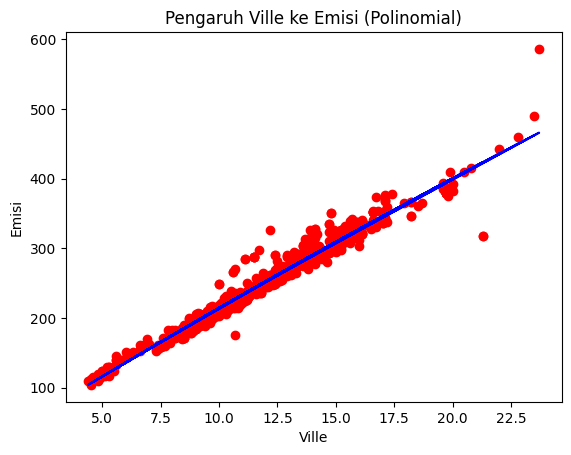

In [26]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Pengaruh Ville ke Emisi (Polinomial)')
plt.xlabel('Ville')
plt.ylabel('Emisi')
plt.show()

#JIKA DIPERHATIKAN DENGAN SEKSAMA GARIS BIRU AGAK SEDIKIT LENGKUNG
#KEMUNGKINAN HASILNYA AKAN LEBIH AKURAT

In [28]:
Y_poly = lin_reg_2.predict(X_poly)
Y_poly

#NILAI YANG TERTERA MERUPAKAN ESTIMASI EMISI BERDASARKAN MODEL POLINOMIAL

array([[177.55649707],
       [193.16562068],
       [235.63198483],
       [264.20057737],
       [286.83025876],
       [233.71629137],
       [239.45920152],
       [239.45920152],
       [258.51188027],
       [214.48290248],
       [224.1169729 ],
       [229.88073422],
       [239.45920152],
       [325.95053915],
       [322.25120965],
       [314.8358697 ],
       [206.75062473],
       [216.41249672],
       [220.26751497],
       [216.41249672],
       [224.1169729 ],
       [216.41249672],
       [214.48290248],
       [231.79920784],
       [231.79920784],
       [231.79920784],
       [264.20057737],
       [227.96087052],
       [247.09695396],
       [216.41249672],
       [226.03961675],
       [226.03961675],
       [252.81067247],
       [271.76604575],
       [249.00291687],
       [269.87676378],
       [277.42555122],
       [346.19746086],
       [346.19746086],
       [346.19746086],
       [329.64430835],
       [222.19293897],
       [233.71629137],
       [233

In [30]:
# Evaluasi model
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")

#OUTPUT MSE DAN MAE MENUNJUKKAN SEBERAPA BESAR KESALAHAN MODEL DALAM MEMPREDIKSI DATA, DENGAN MAE MENUNJUKKAN RATA-RATA SELISIH ABSOLUT ANTARA PREDIKSI DAN NILAI SEBENARNYA
#NILAI R2 = 0.9521 MENUNJUKKAN BAHWA MODEL MENJELASKAN SEKITAR 95.21% VARIASI DATA, MENANDAKAN HUBUNGAN KUAT ANTARA VARIABEL X DAN Y

Mean Squared Error (MSE Poly): 202.7943
Mean Absolute Error (MAE Poly): 9.0976
R-squared (R² Poly): 0.9521
